In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

Acquire and Prep

In [2]:
PER= pd.read_excel('PER.xlsx')

In [3]:
PER.head()

,Rk,Player,Season,Age,Tm,Lg,MP,PER,G,GS,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,LeBron James,2008-09,24,CLE,NBA,37.7,31.7,81,81.0,...,1.1,3.0,1.7,28.4,0.489,0.535,0.344,0.530,0.780,0.591
1,2,Michael Jordan,1987-88,24,CHI,NBA,40.4,31.7,82,82.0,...,1.6,3.1,3.3,35.0,0.535,0.546,0.132,0.537,0.841,0.603
2,3,LeBron James,2012-13,28,MIA,NBA,37.9,31.6,76,76.0,...,0.9,3.0,1.4,26.8,0.565,0.602,0.406,0.603,0.753,0.640
3,4,Michael Jordan,1990-91,27,CHI,NBA,37.0,31.6,82,82.0,...,1.0,2.5,2.8,31.5,0.539,0.551,0.312,0.547,0.851,0.605
4,5,Stephen Curry,2015-16,27,GSW,NBA,34.2,31.5,79,79.0,...,0.2,3.3,2.0,30.1,0.504,0.566,0.454,0.630,0.908,0.669


In [4]:
PER.describe()

,Rk,Age,MP,PER,G,GS,FG,FGA,2P,2PA,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1548.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1515.000000,1600.000000,1600.000000,1600.000000
mean,800.50000,27.003125,34.046563,21.500437,70.513125,64.007752,7.307437,14.872875,6.596938,12.883688,...,0.915062,2.489313,2.614688,19.694500,0.496286,0.514596,0.269328,0.519504,0.779236,0.570520
std,462.02453,3.787919,4.616245,2.696291,14.714964,22.112218,1.820741,3.907622,1.955866,3.847480,...,0.805091,0.758016,0.629852,4.977127,0.050086,0.046090,0.151233,0.042141,0.086822,0.037138
min,1.00000,19.000000,20.000000,18.400000,1.000000,0.000000,2.500000,4.200000,1.400000,2.900000,...,0.000000,0.000000,0.900000,6.500000,0.261000,0.250000,0.000000,0.304000,0.355000,0.433000
25%,400.75000,24.000000,31.500000,19.400000,66.000000,56.000000,6.000000,12.200000,5.200000,10.000000,...,0.300000,2.000000,2.100000,16.200000,0.461000,0.483000,0.189500,0.491750,0.738000,0.544000
50%,800.50000,27.000000,35.000000,20.700000,76.000000,74.000000,7.300000,15.000000,6.500000,12.900000,...,0.600000,2.500000,2.600000,19.600000,0.493000,0.508500,0.314000,0.513000,0.790000,0.567000
75%,1200.25000,29.000000,37.300000,22.900000,81.000000,80.000000,8.500000,17.600000,7.900000,15.525000,...,1.300000,3.000000,3.000000,22.900000,0.524250,0.539000,0.368500,0.545000,0.841000,0.593000
max,1600.00000,40.000000,43.700000,31.700000,85.000000,82.000000,13.400000,27.800000,13.200000,27.000000,...,4.600000,5.700000,4.500000,37.100000,0.714000,0.717000,1.000000,0.714000,1.000000,0.708000


In [5]:
PER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 33 columns):
Rk        1600 non-null int64
Player    1600 non-null object
Season    1600 non-null object
Age       1600 non-null int64
Tm        1600 non-null object
Lg        1600 non-null object
MP        1600 non-null float64
PER       1600 non-null float64
G         1600 non-null int64
GS        1548 non-null float64
FG        1600 non-null float64
FGA       1600 non-null float64
2P        1600 non-null float64
2PA       1600 non-null float64
3P        1600 non-null float64
3PA       1600 non-null float64
FT        1600 non-null float64
FTA       1600 non-null float64
ORB       1600 non-null float64
DRB       1600 non-null float64
TRB       1600 non-null float64
AST       1600 non-null float64
STL       1600 non-null float64
BLK       1600 non-null float64
TOV       1600 non-null float64
PF        1600 non-null float64
PTS       1600 non-null float64
FG%       1600 non-null float64
2P%    

In [6]:
df=pd.DataFrame(PER)

In [7]:
df= df.loc[df['G'] >=65]

In [8]:
df.describe()

,Rk,Age,MP,PER,G,GS,FG,FGA,2P,2PA,...,BLK,TOV,PF,PTS,FG%,2P%,3P%,eFG%,FT%,TS%
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1196.000000,1241.000000,1241.000000,1241.000000,1241.000000,...,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1190.000000,1241.000000,1241.000000,1241.000000
mean,792.335214,26.975020,34.526994,21.570830,77.024980,70.871237,7.458098,15.112571,6.758904,13.157051,...,0.921193,2.530782,2.634730,20.079936,0.498323,0.516070,0.267380,0.520813,0.781005,0.572110
std,467.023399,3.707036,4.360015,2.764277,4.915596,17.749540,1.829190,3.915435,1.966298,3.855114,...,0.814868,0.741285,0.614721,5.003575,0.048885,0.044482,0.149286,0.040808,0.084447,0.036046
min,1.000000,19.000000,20.000000,18.400000,65.000000,0.000000,2.500000,4.200000,1.700000,3.500000,...,0.000000,0.500000,0.900000,6.500000,0.384000,0.396000,0.000000,0.430000,0.355000,0.472000
25%,379.000000,24.000000,32.400000,19.400000,74.000000,70.000000,6.200000,12.400000,5.300000,10.300000,...,0.300000,2.000000,2.200000,16.700000,0.463000,0.485000,0.188000,0.493000,0.740000,0.546000
50%,792.000000,27.000000,35.400000,20.800000,79.000000,77.000000,7.400000,15.200000,6.700000,13.200000,...,0.600000,2.500000,2.600000,20.100000,0.495000,0.510000,0.313000,0.515000,0.791000,0.570000
75%,1199.000000,29.000000,37.600000,22.900000,81.000000,81.000000,8.700000,17.800000,8.100000,15.800000,...,1.300000,3.000000,3.100000,23.200000,0.526000,0.540000,0.367000,0.545000,0.842000,0.595000
max,1600.000000,40.000000,43.100000,31.700000,85.000000,82.000000,13.400000,27.800000,13.200000,27.000000,...,4.600000,5.700000,4.200000,37.100000,0.714000,0.717000,1.000000,0.714000,0.981000,0.702000


#### Clean Data for a Baseline model
Start with points, assists, rebounds to predict PER with a Linear Regreassion Model

In [9]:
base= df[['PTS', 'TRB', 'AST', 'PER']]

In [10]:
base.head()

,PTS,TRB,AST,PER
0,28.4,7.6,7.2,31.7
1,35.0,5.5,5.9,31.7
2,26.8,8.0,7.3,31.6
3,31.5,6.0,5.5,31.6
4,30.1,5.4,6.7,31.5


In [11]:
base= pd.DataFrame(base)
base= base.rename({"TRB": "REB"})

#### Split Data
I dont believe I need to scale the data

In [12]:
X=base[['PTS', 'TRB', 'AST']]
y=base[['PER']]

train, test = train_test_split(df, train_size = .80, random_state = 123)
base.head()

,PTS,TRB,AST,PER
0,28.4,7.6,7.2,31.7
1,35.0,5.5,5.9,31.7
2,26.8,8.0,7.3,31.6
3,31.5,6.0,5.5,31.6
4,30.1,5.4,6.7,31.5


### Exploring data

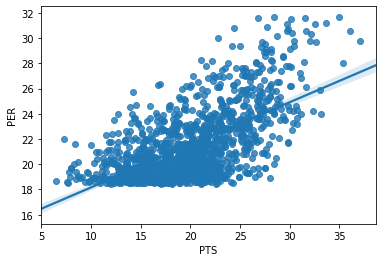

In [13]:
sns.regplot(x="PTS", y="PER", data=base);

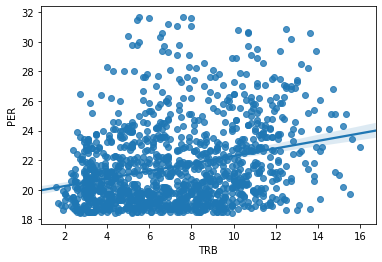

In [15]:
sns.regplot(x="TRB", y="PER", data=base)

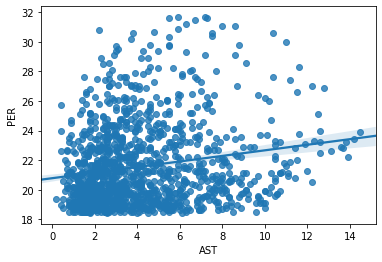

In [16]:
sns.regplot(x="AST", y="PER", data=base)

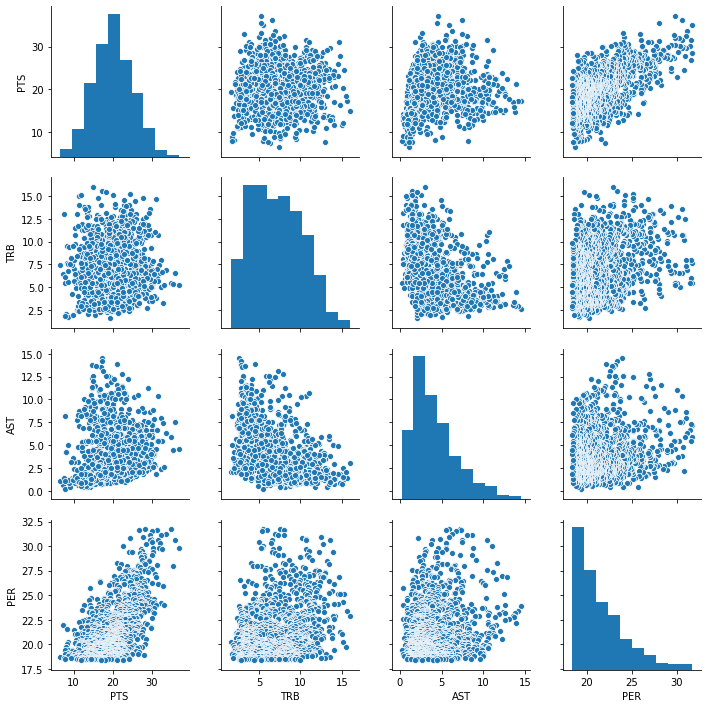

In [18]:
sns.pairplot(base)